# Principal Component Analysis (PCA)

- PCA is a popular dimensionality reduction method
- the core idea:
    1. compute directions of highest variance in the data
    2. do a (linear!) coordinate transform, so that new coordinate axes align with directions of highest variance
    3. reduce dimensionality by projecting data into space formed by n coordinate axes (*components*) of highest dimensionality
- basically, this can be imagened as fitting an ellipsoid do the data and performing a principle axes transformation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rng = np.random.default_rng(19)

In [17]:
# let's create some data

x = rng.uniform(-3, 3, 100)
y = rng.normal(x)

X = np.stack([x, y], axis=1)

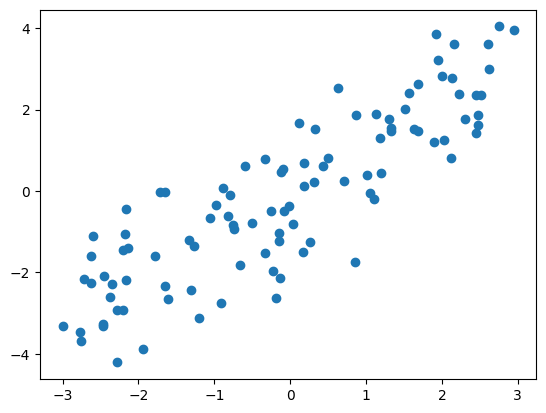

In [ ]:
plt.scatter(X[:, 0], X[:, 1]);

In [ ]:
np.cov(X.T)

array([[2.87595064, 3.00433779],
       [3.00433779, 4.19312154]])

In [ ]:
# let's compute covariance matrix
def get_cov_matrix(x: np.ndarray):
    # np.cov(x.T)
    x = x - x.mean(axis=1, keepdims=True)
    # proportional to X @ X.T
    return np.mean(x[:, np.newaxis, :] * x, axis=-1)

get_cov_matrix(X.T)

array([[2.84719113, 2.97429441],
       [2.97429441, 4.15119032]])

In [50]:
np.linalg.eig(get_cov_matrix(X.T))

EigResult(eigenvalues=array([0.45427189, 6.54410956]), eigenvectors=array([[-0.77914283, -0.62684644],
       [ 0.62684644, -0.77914283]]))

In [51]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

In [52]:
pca.components_

array([[ 0.62684644,  0.77914283],
       [ 0.77914283, -0.62684644]])

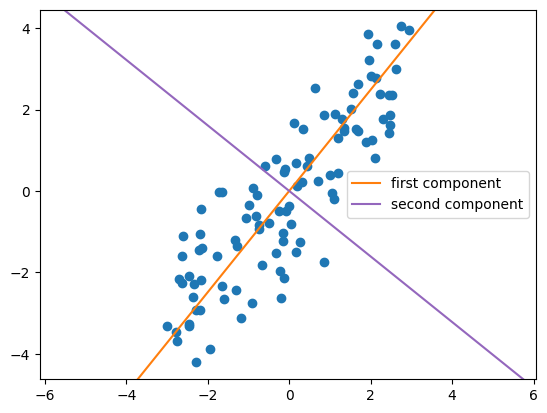

In [37]:
plt.scatter(X[:, 0], X[:, 1])
plt.axline((0,0), pca.components_[0], color="tab:orange", label="first component")
plt.axline((0,0), pca.components_[1], color="tab:purple", label="second component")
plt.legend()
plt.axis("equal");